In [1]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.0 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.6 MB 37.5 MB/s 


In [2]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [29]:
import numpy as np
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union

In [23]:
plt.style.use("ggplot")

#Municipios

In [64]:
cidades = gpd.read_file("/content/SP_Municipios_2020.shp")
cidades.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


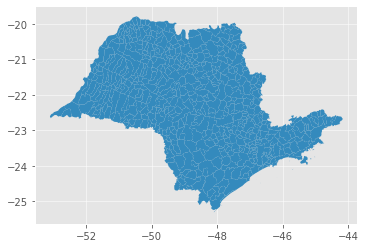

In [30]:
cidades.plot()

In [73]:
cidades.shape

(645, 5)

(-53.5575488504, -43.71392784560001, -25.636916977149998, -19.50073859585)

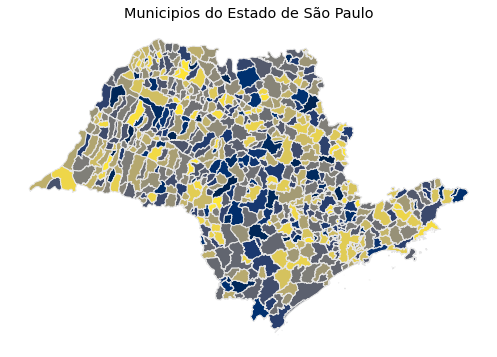

In [72]:
fig, ax = plt.subplots(1, figsize=(10,6))
plt.title("Municipios do Estado de São Paulo")
cidades.plot(column='NM_MUN', cmap='cividis', linewidth=1, ax=ax, edgecolor='0.9', legend = False)
ax.axis('off')
#YlOrRd

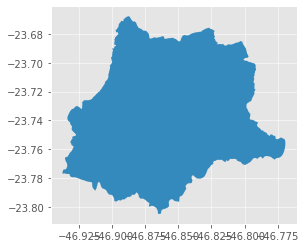

In [31]:
itap = cidades[cidades['NM_MUN'] == "Itapecerica da Serra"]
itap.plot()

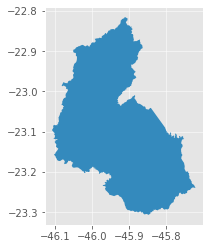

In [33]:
sjc = cidades[cidades['NM_MUN'] == "São José dos Campos"]
sjc.plot()

In [10]:
postos_itap = pd.read_csv("/content/postos_itap - postos_itap.csv")
#postos_itap.head()

In [12]:
postos = gpd.GeoDataFrame(postos_itap, geometry=gpd.points_from_xy(postos_itap['LONGITUDE'], postos_itap['LATITUDE'])) 

In [13]:
postos.crs = "EPSG:4326"

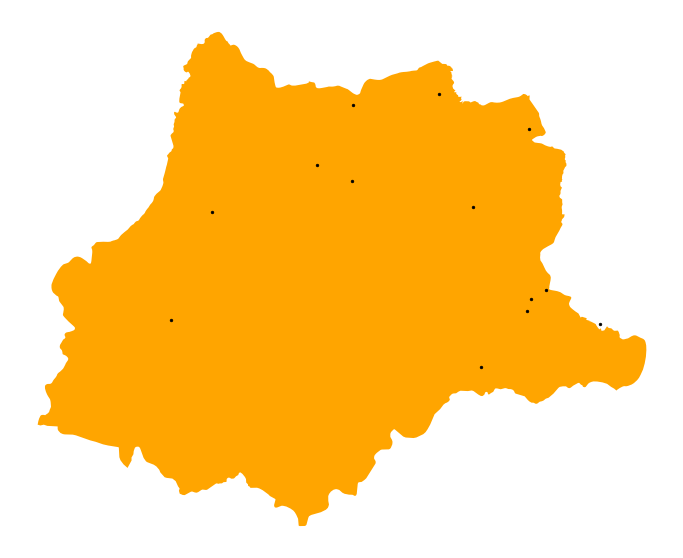

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
itap.plot(ax=ax, color="orange")
postos.plot(ax=ax, markersize=8, color="black")
ax.axis("off")
plt.axis('equal')
plt.show()

#Microrregiões

In [37]:
micro = gpd.read_file("/content/SP_Microrregioes_2020.shp")
micro.head()

,CD_MICRO,NM_MICRO,SIGLA_UF,geometry
0,35001,Jales,SP,"POLYGON ((-51.00119 -20.09633, -51.00109 -20.0..."
1,35002,Fernandópolis,SP,"POLYGON ((-50.43332 -19.98373, -50.43348 -19.9..."
2,35003,Votuporanga,SP,"POLYGON ((-49.90619 -19.93717, -49.90522 -19.9..."
3,35004,São José do Rio Preto,SP,"POLYGON ((-49.57621 -20.78920, -49.57748 -20.7..."
4,35005,Catanduva,SP,"POLYGON ((-49.11108 -21.02710, -49.11158 -21.0..."


In [74]:
micro.tail()

,CD_MICRO,NM_MICRO,SIGLA_UF,geometry
58,35059,Guarulhos,SP,"POLYGON ((-46.36416 -23.27408, -46.36392 -23.2..."
59,35060,Itapecerica da Serra,SP,"POLYGON ((-46.98892 -23.80081, -46.98928 -23.8..."
60,35061,São Paulo,SP,"POLYGON ((-46.33072 -23.70887, -46.33066 -23.7..."
61,35062,Mogi das Cruzes,SP,"POLYGON ((-45.96191 -23.49705, -45.96180 -23.4..."
62,35063,Santos,SP,"MULTIPOLYGON (((-46.16241 -24.33113, -46.16298..."


In [38]:
micro.shape

(63, 4)

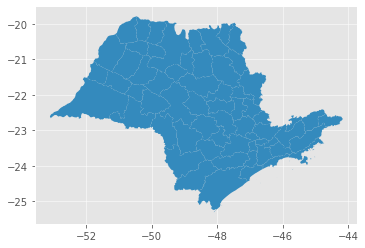

In [35]:
micro.plot()

(-53.5575488504, -43.71392784560001, -25.636916977149998, -19.50073859585)

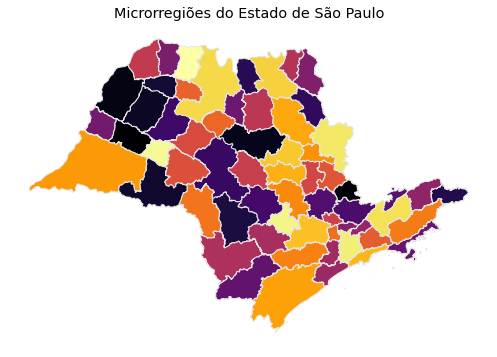

In [62]:
fig, ax = plt.subplots(1, figsize=(10,6))
plt.title("Microrregiões do Estado de São Paulo")
micro.plot(column='NM_MICRO', cmap='inferno', linewidth=1, ax=ax, edgecolor='0.9', legend = False)
ax.axis('off')

#Mesorregiões

In [47]:
meso = gpd.read_file("/content/SP_Mesorregioes_2020.shp")
meso.head()

,CD_MESO,NM_MESO,SIGLA_UF,geometry
0,3501,São José do Rio Preto,SP,"POLYGON ((-50.81212 -20.53115, -50.81288 -20.5..."
1,3502,Ribeirão Preto,SP,"POLYGON ((-47.86981 -20.07615, -47.86960 -20.0..."
2,3503,Araçatuba,SP,"POLYGON ((-51.57519 -20.62342, -51.57518 -20.6..."
3,3504,Bauru,SP,"POLYGON ((-49.42280 -22.29420, -49.42278 -22.2..."
4,3505,Araraquara,SP,"POLYGON ((-48.47108 -21.51269, -48.47221 -21.5..."


In [42]:
meso.tail()

,CD_MESO,NM_MESO,SIGLA_UF,geometry
10,3511,Itapetininga,SP,"POLYGON ((-48.22490 -23.19625, -48.22420 -23.1..."
11,3512,Macro Metropolitana Paulista,SP,"POLYGON ((-46.44284 -22.82453, -46.43968 -22.8..."
12,3513,Vale do Paraíba Paulista,SP,"MULTIPOLYGON (((-45.66298 -24.08365, -45.66318..."
13,3514,Litoral Sul Paulista,SP,"MULTIPOLYGON (((-48.03716 -25.35794, -48.03750..."
14,3515,Metropolitana de São Paulo,SP,"MULTIPOLYGON (((-46.16241 -24.33113, -46.16298..."


In [40]:
meso.shape

(15, 4)

In [48]:
print(type(meso))

<class 'geopandas.geodataframe.GeoDataFrame'>


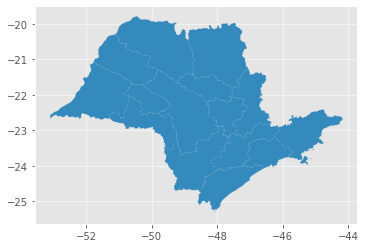

In [41]:
meso.plot()

In [43]:
import plotly.express as px
import pyproj

In [45]:
meso.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

(-53.5575488504, -43.71392784560001, -25.636916977149998, -19.50073859585)

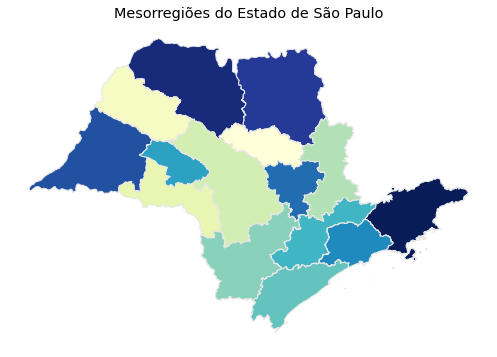

In [59]:
fig, ax = plt.subplots(1, figsize=(10,6))
plt.title("Mesorregiões do Estado de São Paulo")
meso.plot(column='NM_MESO', cmap='YlGnBu', linewidth=1, ax=ax, edgecolor='0.9', legend = False)
ax.axis('off')